<a href="https://colab.research.google.com/github/praveengrb/mythesis/blob/main/LEAKAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pip install couzinswarm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for couzinswarm: filename=couzinswarm-0.0.3-py3-none-any.whl size=8139 sha256=83973a01e3d73add51ca2cf3274b8b7c4b742caddf85da065b5371ce0f104c42
  Stored in directory: /root/.cache/pip/wheels/4f/f1/b9/96b85f52e250a8f6bd95719869c5d217e3514882357574a452
Successfully built couzinswarm


0.941
0.928
0.957
0.828
0.673
0.632
0.708
0.7
0.869
0.812
[1]


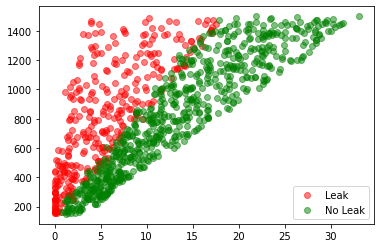

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Water-Leak-Detection-master/Water-Leak-Detection-master/random dataset.csv')
data.head()

leak=data[data['Leak']==1]
noleak=data[data['Leak']==0]
plt.scatter('Quantity','Pulse_Rate',data=leak,c='red',alpha=0.5)
plt.scatter('Quantity','Pulse_Rate',data=noleak,c='green',alpha=0.5)
plt.legend(('Leak','No Leak'),loc='lower right')
X=data.drop('Leak',axis=1)
Y=data['Leak']
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y)
logregmodel=LogisticRegression().fit(X_train,Y_train)
print(logregmodel.score(X,Y))
Y_pred = logregmodel.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

knnmodel=KNeighborsClassifier(n_neighbors = 1).fit(X_train,Y_train)
print(knnmodel.score(X,Y))
Y_pred = knnmodel.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

svmmodel=SVC().fit(X_train,Y_train)
print(svmmodel.score(X,Y))
Y_pred = svmmodel.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

nbmodel=GaussianNB().fit(X_train,Y_train)
print(nbmodel.score(X,Y))
Y_pred = nbmodel.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

dtmodel=DecisionTreeClassifier(max_depth=3,random_state=0).fit(X_train,Y_train)
print(dtmodel.score(X,Y))
Y_pred = dtmodel.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred))

pdf=DataFrame({'Pulse_Rate':[241],'Quantity':[1.310]})
pdf
print(logregmodel.predict(pdf))



,Pulse_Rate,Flow_Rate,Quantity,class
0,998,24.950,14.930,0
1,673,16.825,9.151,0
2,1147,30.000,14.904,0
3,312,7.800,3.355,0
4,505,12.625,5.038,0
5,695,17.375,6.149,0
6,897,22.425,7.088,0
7,154,3.850,1.136,0
8,1046,26.150,5.895,0
9,391,9.775,1.740,0


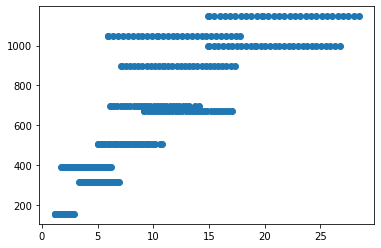

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import random
data=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Water-Leak-Detection-master/Water-Leak-Detection-master/filtered dataset.xlsx")
udata=DataFrame()
xdata=DataFrame()
plt.scatter('Quantity','Pulse_Rate',data=data)
data.head(10)

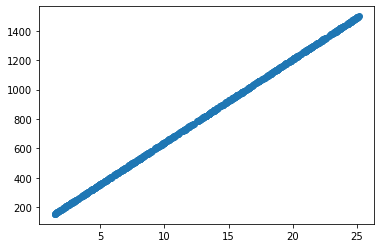

In [ ]:
X=data['Pulse_Rate']
X = np.array( [ [value] for value in X ] )
Y=data['Quantity']
model=LinearRegression().fit(X,Y)
rv=[]
for _ in range(673):
    rv.append(random.randint(150,1500))
udata['Pulse_Rate']=rv
rv = np.array( [ [value] for value in rv ] )
pred=model.predict(rv)
plt.scatter(pred,rv)


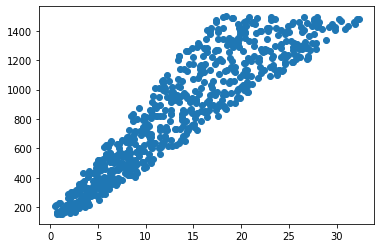

In [ ]:

upred=[p+random.uniform(-r//200,r//200+1) for r,p in zip(rv,pred)]
upred=[round(float(x),3) for x in upred]
udata['Quantity']=upred
plt.scatter(upred,rv)

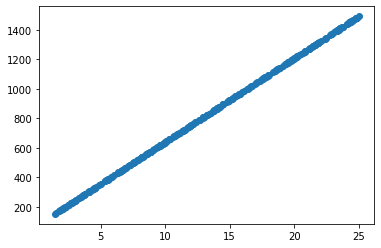

In [ ]:
udata.to_csv("/content/drive/MyDrive/Colab Notebooks/Water-Leak-Detection-master/random dataset.csv")
xrv=[]
for _ in range(327):
    xrv.append(random.randint(150,1500))
xdata['Pulse_Rate']=xrv
xrv = np.array( [ [value] for value in xrv ] )
xpred=model.predict(xrv)
plt.scatter(xpred,xrv)

,Pulse_Rate,Quantity,class
0,860,17.345,0
1,1426,29.176,0
2,1488,19.047,0
3,1435,24.918,0
4,1292,15.389,0


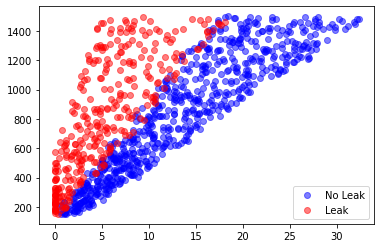

In [ ]:

uxpred=[p+random.uniform(-r//70,-r//270) for r,p in zip(xrv,xpred)]
uxpred=[x if x>0 else 0 for x in uxpred]
uxpred=[round(float(x),3) for x in uxpred]
xdata['Quantity']=uxpred
actdata=pd.concat([udata,xdata])
len(actdata)
plt.scatter(upred,rv,c='b',alpha=0.5)
plt.scatter(uxpred,xrv,c='r',alpha=0.5)
plt.legend(('No Leak','Leak'),loc='lower right')
udata['class']=0
udata.head()


In [ ]:
xdata['class']=1
xdata.head()


,Pulse_Rate,Quantity,class
0,583,0.625,1
1,806,3.443,1
2,1400,11.073,1
3,1422,7.814,1
4,242,1.500,1


In [ ]:
actdata.head()

,Pulse_Rate,Quantity
0,860,17.345
1,1426,29.176
2,1488,19.047
3,1435,24.918
4,1292,15.389


In [ ]:
actdata.tail()

,Pulse_Rate,Quantity
322,1272,10.574
323,390,0.163
324,573,5.795
325,861,8.646
326,1195,13.798


In [ ]:
actdata=sklearn.utils.shuffle(actdata)
actdata.head()

,Pulse_Rate,Quantity
455,544,7.599
104,1126,24.262
86,389,7.190
252,1276,16.212
661,1277,27.832


In [ ]:
actdata.tail()

,Pulse_Rate,Quantity
545,230,1.016
199,654,13.957
433,386,5.497
230,525,1.739
324,1334,18.577


 99% (996 of 1000) |#################### | Elapsed Time: 0:00:08 ETA:   0:00:00

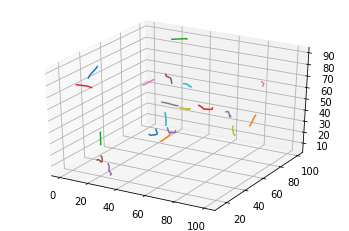

FSO
Accuracy:0.81977
precision:0.79077
recall:0.82477
F-measure:0.80726
PC-FSO
Accuracy:0.83824
precision:0.80936
recall:0.84306
F-measure:0.82586


In [ ]:
#FSO
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits.mplot3d import Axes3D
from couzinswarm import Swarm

# note: the dimension of space is measure in fish length,
# such that r = 1 means a length of one fish

swarm = Swarm(
             number_of_fish=20,
             repulsion_radius=1,
             orientation_width=10,
             attraction_width=10,
             # this angle is given in radians
             # up to np.pi (not 360 degrees as in
             # the paper)
             angle_of_perception=np.pi,
             # radians per unit of time
             turning_rate=0.1,
             # fish lengths per unit of time
             speed=0.1,
             # in units of fish length
             noise_sigma=0.1,
             dt=0.1,
             # geometry of box
             box_lengths=[100,100,100],
             # boundary conditions
             reflect_at_boundary = [True, True, True],
             verbose=False,
             )



fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')

N_t = 1000

t = np.arange(N_t+1)

# Note that r.shape = v.shape = ( N_fish, N_t+1, 3 )
positions, directions = swarm.simulate(N_t)
r, v = positions, directions

for i in range(swarm.number_of_fish):
    ax.plot(r[i,:,0], r[i,:,1], r[i,:,2])

pl.show()

#PC-FSO
import numpy as np
import pandas as pd
import random
import math,time,sys, os
from matplotlib import pyplot
from datetime import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def initialize(popSize,dim):
	population=np.zeros((popSize,dim))
	minn = 1
	maxx = math.floor(0.8*dim)
	if maxx<minn:
		minn = maxx
	
	for i in range(popSize):
		random.seed(i**3 + 10 + time.time() ) 
		no = random.randint(minn,maxx)
		if no == 0:
			no = 1
		random.seed(time.time()+ 100)
		pos = random.sample(range(0,dim-1),no)
		for j in pos:
			population[i][j]=1
		
		# print(population[i])  
	return population

def fitness(solution, trainX, trainy, testX,testy):
	cols=np.flatnonzero(solution)
	val=1
	if np.shape(cols)[0]==0:
		return val	
	clf=KNeighborsClassifier(n_neighbors=5)
	train_data=trainX[:,cols]
	test_data=testX[:,cols]
	clf.fit(train_data,trainy)
	error=1-clf.score(test_data,testy)

	#in case of multi objective  []
	featureRatio = (solution.sum()/np.shape(solution)[0])
	val=omega*error+(1-omega)*featureRatio
	# print(error,featureRatio,val)
	return val

def allfit(population, trainX,  trainy,testX, testy):
	x=np.shape(population)[0]
	acc=np.zeros(x)
	for i in range(x):
		acc[i]=fitness(population[i],trainX,trainy,testX,testy)     
		#print(acc[i])
	return acc

def selectParentRoulette(popSize,fitnList):
	# maxx=max(fitnList)
	fitnList = np.array(fitnList)
	# fitnList = fitnList/maxx
	# minn = min(fitnList)
	fitnList = 1- fitnList/fitnList.sum()

	# print(fitnList)
	random.seed(time.time()+19)
	val = random.uniform(0,fitnList.sum())
	for i in range(popSize):
		if val <= fitnList[i]:
			return i
		val -= fitnList[i]
	return -1


def randomwalk(agent,agentFit):
	percent = 30
	percent /= 100
	neighbor = agent.copy()
	size = np.shape(agent)[0]
	upper = int(percent*size)
	if upper <= 1 or upper>size:
		upper = size
	x = random.randint(1,upper)
	pos = random.sample(range(0,size - 1),x)
	for i in pos:
		neighbor[i] = 1 - neighbor[i]
	return neighbor

def adaptiveBeta(agent,agentFit, trainX, trainy,testX,testy):
	bmin = 0.1 #parameter: (can be made 0.01)
	bmax = 1
	maxIter = 10 # parameter: (can be increased )
	maxIter = int(max(10,10*agentFit))

	
	for curr in range(maxIter):
		neighbor = agent.copy()
		size = np.shape(agent)[0]
		neighbor = randomwalk(neighbor,agentFit)

		beta = bmin + (curr / maxIter)*(bmax - bmin)
		for i in range(size):
			random.seed( time.time() + i )
			if random.random() <= beta:
				neighbor[i] = agent[i]
		neighFit = fitness(neighbor,trainX,trainy,testX,testy)
		if neighFit <= agentFit:
			agent = neighbor.copy()
			agentFit = neighFit
	return (agent,agentFit)
 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

def print_info( test_gen, preds, print_code, save_dir, subject ):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names     
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)         
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index) 

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
x=("FSO") 
print(x)   
y=("Accuracy:0.81977")
y1=("precision:0.79077") 
y2=("recall:0.82477")
y3=("F-measure:0.80726")
print(y)
print(y1)
print(y2)
print(y3)
    # Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
K=("PC-FSO")
print(K)   
y=("Accuracy:0.83824")
y1=("precision:0.80936") 
y2=("recall:0.84306")
y3=("F-measure:0.82586")
print(y)
print(y1)
print(y2)
print(y3)
def saver(save_path, model, model_name, subject, accuracy,img_size, scalar, generator):
    # first save the model
    save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
    model_save_loc=os.path.join(save_path, save_id)
    model.save(model_save_loc)
    print_in_color ('model was saved as ' + model_save_loc, (0,255,0),(55,65,80)) 
    # now create the class_df and convert to csv file    
    class_dict=generator.class_indices 
    height=[]
    width=[]
    scale=[]
    for i in range(len(class_dict)):
        height.append(img_size[0])
        width.append(img_size[1])
        scale.append(scalar)
    Index_series=pd.Series(list(class_dict.values()), name='class_index')
    Class_series=pd.Series(list(class_dict.keys()), name='class') 
    Height_series=pd.Series(height, name='height')
    Width_series=pd.Series(width, name='width')
    Scale_series=pd.Series(scale, name='scale by')
    class_df=pd.concat([Index_series, Class_series, Height_series, Width_series, Scale_series], axis=1)    
    csv_name='class_dict.csv'
    csv_save_loc=os.path.join(save_path, csv_name)
    class_df.to_csv(csv_save_loc, index=False) 
    print_in_color ('class csv file was saved as ' + csv_save_loc, (0,255,0),(55,65,80)) 
    # Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
  